In [1]:
# Analyzing Retreived Tweets from 1 December 2019 Until 14 April 2020 | Topic: COVID-19 / Students 
# Total tweets = 4424 Tweets

# Importing Libraries

In [122]:
#importing libraries  

import re
import pandas as pd
import numpy as np
import nltk 
import unidecode
import operator

import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib
import requests

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer
from nltk.text import Text
from nltk.corpus import stopwords

from numpy import zeros
from scipy.linalg import svd
from math import log	# needed for TFIDF
from numpy import asarray, sum
import nltk


%matplotlib inline


# Reading and Descovering Dataset

In [123]:
# Importing the Tweets dataset

data = pd.read_csv('COVID-19Students_Tweets.csv')

In [124]:
# Getting to know the data (General Info)

print('The type of the data file is:\n-----------------------------\n', type(data),'\n')
print('General Info about data:\n--------------------------------------')
print('Columns:\n------------\n',data.columns)
print('\n')
print(data.info())

The type of the data file is:
-----------------------------
 <class 'pandas.core.frame.DataFrame'> 

General Info about data:
--------------------------------------
Columns:
------------
 Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites',
       'Sentiment', 'text', 'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
date         4424 non-null object
username     4424 non-null object
to           629 non-null object
replies      4424 non-null int64
retweets     4424 non-null int64
favorites    4424 non-null int64
Sentiment    4424 non-null object
text         4424 non-null object
geo          0 non-null float64
mentions     2090 non-null object
hashtags     2516 non-null object
id           4424 non-null float64
permalink    4424 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 449.4+ KB
None


In [125]:
# Checking null values in the dataset table

data.isnull().any()

date         False
username     False
to            True
replies      False
retweets     False
favorites    False
Sentiment    False
text         False
geo           True
mentions      True
hashtags      True
id           False
permalink    False
dtype: bool

In [126]:
# Checking how many rows and columns in the dataset table

data.shape 

(4424, 13)

In [127]:
# Printing first two rows of dataset
data.head(2)

,date,username,to,replies,retweets,favorites,Sentiment,text,geo,mentions,hashtags,id,permalink
0,2020-02-22 21:27,NetworksManager,NaN,4,32,35,Neutral,University student at Ferdos dormitory in Iran...,NaN,NaN,#coronavirus #Covid19 #SARSCoV19pic,1.230000e+18,https://twitter.com/NetworksManager/status/123...
1,2020-02-23 15:11,NetworksManager,NaN,16,153,138,Negative,Beheshti University students are protesting in...,NaN,NaN,#Tehran #coronavirus #Iran #Covid19 #SARSCoV19pic,1.230000e+18,https://twitter.com/NetworksManager/status/123...


# Dataset Cleaning

In [128]:
# -------------------- (Cleaning date column) ------------------------
# Splitting date and time to two separate columns

# converting date column to a date-time object:
data['date-time-obj'] = pd.to_datetime(data['date'])

# create two columns with date-only and time-only values
data['date'] = data['date-time-obj'].dt.date
data['time'] = data['date-time-obj'].dt.time
 
# delete the created object column
del data['date-time-obj']

#Save data to a new csv file
data.to_csv('COVID-19Students_Tweets_2.csv', index=False)

In [129]:
# importing the new dataset 

data = pd.read_csv('COVID-19Students_Tweets_2.csv')

In [130]:
# Getting to know the data (General Info)

print('The type of the data file is:\n-----------------------------\n', type(data),'\n')
print('General Info about data:\n--------------------------------------')
print(data.info())

The type of the data file is:
-----------------------------
 <class 'pandas.core.frame.DataFrame'> 

General Info about data:
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
date         4424 non-null object
username     4424 non-null object
to           629 non-null object
replies      4424 non-null int64
retweets     4424 non-null int64
favorites    4424 non-null int64
Sentiment    4424 non-null object
text         4424 non-null object
geo          0 non-null float64
mentions     2090 non-null object
hashtags     2516 non-null object
id           4424 non-null float64
permalink    4424 non-null object
time         4424 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 484.0+ KB
None


In [131]:
# Printing first two rows of dataset
data.head(2)

,date,username,to,replies,retweets,favorites,Sentiment,text,geo,mentions,hashtags,id,permalink,time
0,2020-02-22,NetworksManager,NaN,4,32,35,Neutral,University student at Ferdos dormitory in Iran...,NaN,NaN,#coronavirus #Covid19 #SARSCoV19pic,1.230000e+18,https://twitter.com/NetworksManager/status/123...,21:27:00
1,2020-02-23,NetworksManager,NaN,16,153,138,Negative,Beheshti University students are protesting in...,NaN,NaN,#Tehran #coronavirus #Iran #Covid19 #SARSCoV19pic,1.230000e+18,https://twitter.com/NetworksManager/status/123...,15:11:00


In [132]:
# creating a new column (Tweeting Hour) for further analysis

data['Tweeting Hour'] = data['time'].str[:2]

In [133]:
# creating a new column (Tweeting Month) for further analysis

data['Tweeting Month'] = data['date'].str[5:7]

In [134]:
# Cleaning data by dropping redundant columns

cleaned_table= data.drop(columns=['username','to','replies','geo','mentions','id','hashtags','permalink'])
cleaned_table.tail(5)

,date,retweets,favorites,Sentiment,text,time,Tweeting Hour,Tweeting Month
4419,2020-04-13,0,0,Neutral,Information and FAQs for Student Loan Relief d...,07:24:00,07,04
4420,2020-04-13,0,0,Neutral,wvstatejournal: WVU reports the first positive...,07:37:00,07,04
4421,2020-04-13,0,0,Neutral,Commentary: Challenges for PhD students during...,07:42:00,07,04
4422,2020-04-13,0,0,Negative,"There is nothing unusual about coronavirus, Wo...",08:52:00,08,04
4423,2020-04-13,1,2,Neutral,CHECK YOUR FINANCES: New credit card? Refinanc...,10:10:00,10,04


In [135]:
cleaned_table.head(5)

,date,retweets,favorites,Sentiment,text,time,Tweeting Hour,Tweeting Month
0,2020-02-22,32,35,Neutral,University student at Ferdos dormitory in Iran...,21:27:00,21,02
1,2020-02-23,153,138,Negative,Beheshti University students are protesting in...,15:11:00,15,02
2,2020-02-23,19,14,Neutral,#Italy exchange student and Croatian woman wit...,15:13:00,15,02
3,2020-02-25,10,8,Neutral,50 Croatian students back to #Croatia on buses...,09:54:00,09,02
4,2020-02-26,39,21,Neutral,‚ÄúOfficial‚Äù U.S. #coronavirus cases jump to...,12:27:00,12,02


In [136]:
cleaned_table.loc[2000]

date                                                     2020-04-08
retweets                                                          1
favorites                                                         6
Sentiment                                                   Neutral
text              ESL students struggle amidst COVID-19 - Educat...
time                                                       13:45:00
Tweeting Hour                                                    13
Tweeting Month                                                   04
Name: 2000, dtype: object

# Removing Special Charachters using regex

In [1]:
# Creating a function for removing patterns using regex 

def remove_pattern(texty,pattern):
    r = re.findall(pattern,texty)
    
    for i in r:
        texty = re.sub(i,"",texty)
#re.sub() specify a regular expression pattern in the first argument,
#a new string in the second argument, and a string to be processed in the third argument.
    
    return texty

In [138]:
# Applying the funtion cleaning funtion

cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "@[\w]*")
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], ":")
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(,)")
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(``)")
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(|)")
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(@)")
print('Done cleaning . . . ')

Done cleaning . . . 


In [139]:
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(’)")
#cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(^[0-9].*[a-zA-Z]$)")

print('Done cleaning . . . ')

Done cleaning . . . 


In [140]:
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], r'^https?:\/\/.*[\r\n]*')
cleaned_table['text'] = np.vectorize(remove_pattern)(cleaned_table['text'], "(w/)")

print('Done cleaning . . . ')

Done cleaning . . . 


In [141]:
# Removing Punctuation, Numbers, and Special Characters
cleaned_table['text'] = cleaned_table['text'].str.replace("[^a-zA-Z#]", " ")

print('Done cleaning . . . ')

Done cleaning . . . 


In [142]:
# Removing Short Words 
cleaned_table['text'] = cleaned_table['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

print('Done cleaning . . . ')

Done cleaning . . . 


In [143]:
# Removing redundant words

cleaned_table['text'] = cleaned_table['text'].str.replace("https", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("http", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("com", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("www", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("pic", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("url", " ")
cleaned_table['text'] = cleaned_table['text'].str.replace("org", " ")

print('Done cleaning . . . ')

Done cleaning . . . 


# Studying the sentament of the whole tweets

In [144]:
# Studying the sentament of tweets

Positive = len(cleaned_table[cleaned_table["Sentiment"]=="Positive"])
Negative = len(cleaned_table[cleaned_table["Sentiment"]=="Negative"])
Neutral = len(cleaned_table[cleaned_table["Sentiment"]=="Neutral"])

Sentiment_C = [Positive,Negative,Neutral]
Sentiment_G = ['Positive','Negative','Neutral']

Sentiment_Count = pd.DataFrame({'Sentiment':Sentiment_G,'Sentiment_Count':Sentiment_C},index=[i for i in range(1,4)])
Sentiment_Count.T

,1,2,3
Sentiment,Positive,Negative,Neutral
Sentiment_Count,789,583,3052


In [145]:
# The mean of retweets and favorites in the whole dataset table
data.groupby('Sentiment')[['retweets','favorites']].mean().round(2) 


,retweets,favorites
Sentiment,,
Negative,3.02,13.20
Neutral,3.82,10.94
Positive,3.57,12.12


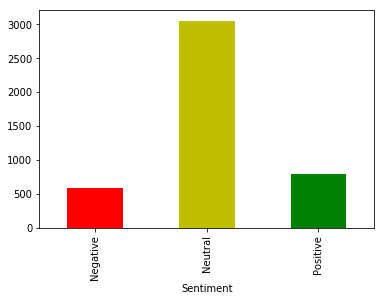

In [146]:
# Visualizing Sentiment Count for whole dataset

Sentiment_count=cleaned_table.groupby('Sentiment').count()
Sentiment_count["text"].plot.bar(color=['r', 'y', 'g'])
plt.savefig('1.png')

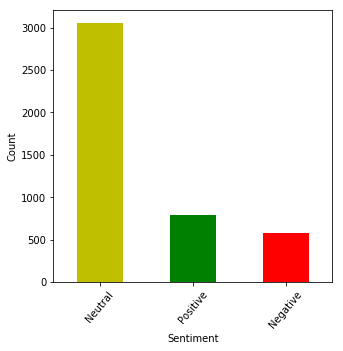

In [147]:
#Another way to plot the data groubed by Sentiment.
plt.figure(figsize=(5,5))
Sentiment_ = cleaned_table.groupby('Sentiment')
Sentiment_.size().sort_values(ascending=False).plot.bar(color=['y', 'g', 'r'])
plt.xticks(rotation=50)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [148]:
# Which hours have the maximum number of tweets (Tweeting peak hours)
# Can be found by Total number of tweets in each hour category

cleaned_table.groupby('Tweeting Hour')[['text']].count().T

Tweeting Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
text,149,156,123,91,55,32,15,18,17,36,...,348,362,354,373,338,300,281,281,232,193


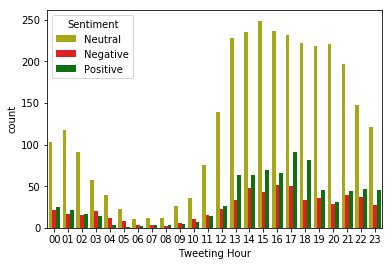

In [149]:
# representing the time slot during which all tweets posted 
colors = ['y','r','g']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Tweeting Hour', hue='Sentiment', data = cleaned_table)
plt.savefig('2.png')

In [150]:
# Which date has the highest number of tweets

cleaned_table.groupby('Tweeting Month')[['text']].count().T

Tweeting Month,02,03,04
text,11,1160,3253


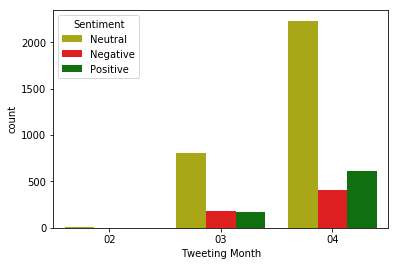

In [151]:
# representing the time slot during which all tweets posted 
colors = ['y','r','g']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Tweeting Month', hue='Sentiment', data = cleaned_table)
plt.savefig('3.png')

# Starting to Analyze on columns

# Favorites

In [152]:
# Which tweet got the highest favorite, what is it, and what is it sentiment

Max_Fav = cleaned_table[['favorites']].agg('max')
print ('The highest (Tweet favorite) number is:\n--------------------------------\n',Max_Fav)

The highest (Tweet favorite) number is:
--------------------------------
 favorites    8382
dtype: int64


In [153]:
# Extracting top 50% based on favorite
#-------------------------------------------------->check the head after adding the rest of tweets
Max_Favs = cleaned_table.sort_values(by =['favorites'], ascending = [False])
print('\n ---> Top 50% of tweets (2212 tweets) based on favorites are:\n-------------------------')
Max_Favs.loc[:,['favorites','Sentiment','date','text']].head(5)
plt.savefig('4.png')


 ---> Top 50% of tweets (2212 tweets) based on favorites are:
-------------------------


<Figure size 432x288 with 0 Axes>

In [154]:
# Extracting least 50% based on favorite
# This set with the top 50% will be used for Jaccard Sililarity

Least_Favs = cleaned_table.sort_values(by =['favorites'], ascending = [True])
print('\n ---> Least 50% of tweets (2212 tweets) based on favorites are:\n-------------------------')
Least_Favs.loc[:,['favorites','Sentiment','date','text']].head(5)


 ---> Least 50% of tweets (2212 tweets) based on favorites are:
-------------------------


,favorites,Sentiment,date,text
2211,0,Neutral,2020-04-08,Mirror diameter meters here and his students w...
3161,0,Positive,2020-04-09,Continuing his efforts protect the health and ...
1307,0,Neutral,2020-04-07,The White House Press Corps weak seen better q...
1305,0,Neutral,2020-04-06,didn include our UMD student but how know UMD ...
3165,0,Positive,2020-04-09,Continuing his efforts protect the health and ...


In [155]:
# Printing top tweet based on favorite
top_tweet_fav = Max_Favs.loc[933,['text']]
print('\nThe text of the top tweet based on favorite is:\n-----------------------------\n',top_tweet_fav)


The text of the top tweet based on favorite is:
-----------------------------
 text    Millennials trying figure out how their stimul...
Name: 933, dtype: object


In [156]:
# showing top 50% tweets (basde on favorites) sentiment count

Max_Favs50 =Max_Favs.head(2212)

top_p = len(Max_Favs50[Max_Favs50["Sentiment"]=="Positive"])
top_neg = len(Max_Favs50[Max_Favs50["Sentiment"]=="Negative"])
top_neu = len(Max_Favs50[Max_Favs50["Sentiment"]=="Neutral"])


FavSentiment_C = [top_p,top_neg,top_neu]
FavSentiment_G = ['Positive','Negative','Neutral']

FavSentiment_Count = pd.DataFrame({'Sentiment':FavSentiment_G,'Sentiment_Count':FavSentiment_C},index=[i for i in range(1,4)])
FavSentiment_Count.T


,1,2,3
Sentiment,Positive,Negative,Neutral
Sentiment_Count,480,282,1450


Plotting the top 50% of tweets based on favorites 
-----------------------


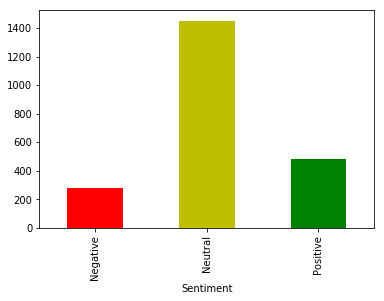

In [157]:
# plotting the sentiment of top 50% tweets based on favorite

print('Plotting the top 50% of tweets based on favorites \n-----------------------')

Max_Favs50_count=Max_Favs50.groupby('Sentiment').count()
Max_Favs50_count["text"].plot.bar(color=['r','y','g'])



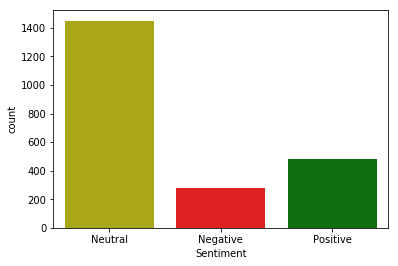

In [158]:
# Another way to plot the the sentiment of top 50% tweets based on favorite

colors = ['Y','R','G']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Sentiment', data = Max_Favs50)

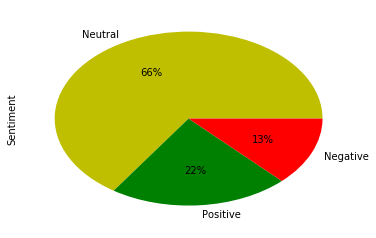

In [159]:
# Showing the percentage of total count of Sentiment in top 50% tweets based on favorites
colors = ['y','g','r']
Max_Favs50.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors = colors)


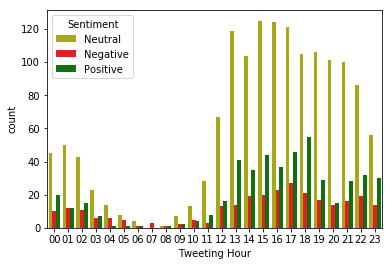

In [160]:
# representing the time slot during which the top 50% were posted (based on favorite)
colors = ['y','r','g']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Tweeting Hour', hue='Sentiment', data = Max_Favs50)

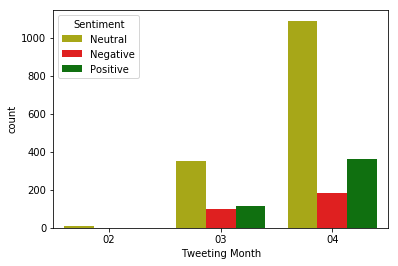

In [161]:
# representing months during which the top 50% were posted (based on favorite)
colors = ['y','r','g']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Tweeting Month', hue='Sentiment', data = Max_Favs50)

# Retweets

In [162]:
# Which tweet got the highest retweets, what is it, and what is it sentiment

Max_ret = cleaned_table[['retweets']].agg('max')
print ('The highest retweet number is:\n--------------------------------\n',Max_ret)

The highest retweet number is:
--------------------------------
 retweets    2393
dtype: int64


In [163]:
# Extracting top 50% based on retwets

Max_rets = cleaned_table.sort_values(by =['retweets'], ascending = [False])
print('\n ---> Top 50% of tweets (2212 tweets) based on retweets are:\n-----------------------------------------------')
Max_rets.loc[:,['retweets','Sentiment','date','text']].head(5)


 ---> Top 50% of tweets (2212 tweets) based on retweets are:
-----------------------------------------------


,retweets,Sentiment,date,text
933,2393,Neutral,2020-03-25,Millennials trying figure out how their stimul...
97,656,Neutral,2020-03-11,Kent State Mike DeWine HigherEd Institutions a...
1612,484,Neutral,2020-04-07,BREAKING Today signing Executive Order waiving...
3145,346,Positive,2020-04-09,Continuing his efforts protect the health and ...
2543,246,Neutral,2020-04-09,student from Sarawak passed away due COVID tod...


In [164]:
# Printing top tweet based on retweets
top_tweet_ret = Max_rets.loc[933,['text']]
print('\nThe text of the top tweet based on retweets is:\n-----------------------------\n',top_tweet_ret)



The text of the top tweet based on retweets is:
-----------------------------
 text    Millennials trying figure out how their stimul...
Name: 933, dtype: object


In [165]:
# showing top 50% tweets (basde on retweets) sentiment count

Max_rets50 =Max_rets.head(2212)

top_re_p = len(Max_Favs50[Max_Favs50["Sentiment"]=="Positive"])
top_re_neg = len(Max_Favs50[Max_Favs50["Sentiment"]=="Negative"])
top_re_neu = len(Max_Favs50[Max_Favs50["Sentiment"]=="Neutral"])


ReSentiment_C = [top_re_p,top_re_neg,top_re_neu]
ReSentiment_G = ['Positive','Negative','Neutral']

ReSentiment_Count = pd.DataFrame({'Sentiment':ReSentiment_G,'Sentiment_Count':ReSentiment_C},index=[i for i in range(1,4)])
ReSentiment_Count.T


,1,2,3
Sentiment,Positive,Negative,Neutral
Sentiment_Count,480,282,1450


Plotting the top 50% of tweets based on retweets 
-----------------------


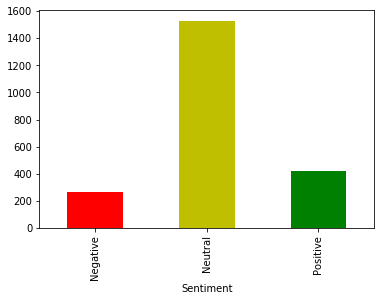

In [166]:
# plotting the sentiment of top 50% tweets based on retweets

print('Plotting the top 50% of tweets based on retweets \n-----------------------')

Max_rets50_count=Max_rets50.groupby('Sentiment').count()
Max_rets50_count["text"].plot.bar(stacked=True, color = ['r','y','g'])

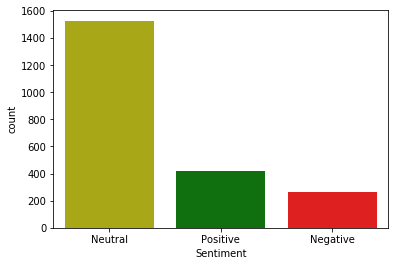

In [167]:
# Another way to plot the the sentiment of top 50% tweets based on retweets
colors = ['y','g','r']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Sentiment', data = Max_rets50)

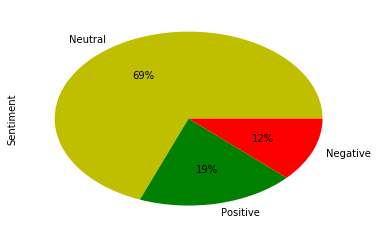

In [168]:
# Showing the percentage of total count of Sentiment in top 50% tweets based on retweets
colors = ['y','g','r']
Max_rets50.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors)


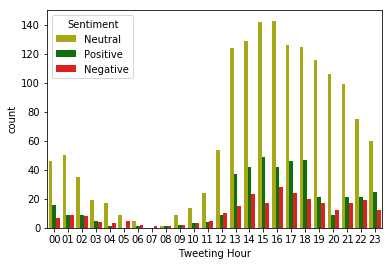

In [169]:
# representing the time slot during which the top 50% were posted (based on retweets)

colors = ['y','g','r']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Tweeting Hour', hue='Sentiment', data = Max_rets50)

# Jaccard Similarity for Two texts (Top/Least 50 tweets dataset)

In [170]:
# Applying Jaccard Similarity to check how top 50% of tweets have similar words percent to Least 50% of tweets

Max_Favs_Text = str(Max_Favs.text)
#print(type(Max_Favs_Text))
#print(Max_Favs_Text)

Least_Favs_Text = str(Least_Favs.text)
#print(type(Least_Favs_Text))
#print(Least_Favs_Text)

MaxTokens = word_tokenize(Max_Favs_Text)
#print(MaxTokens)

LeastTokens = word_tokenize(Least_Favs_Text)
#print(LeastTokens)

union = set(MaxTokens).union(set(LeastTokens))
#print (union)

intersection = set(MaxTokens).intersection(set(LeastTokens))
#print (intersection)

jaccard_similarity=len(intersection)/float(len(union)) 
# The higher the percentage, the more similar the two populations
print (jaccard_similarity)

0.5051334702258727


# TF/IDF for the Two Top tweets based on favorites and retweets

In [171]:
# Preparing the two tweets for TF/IDF calculation

# Step1: Tokenizing the two tweets
Top_Fav_Text = Max_Favs.text[0]
#print(Top_Fav_Text)

Top_Ret_Text = Max_rets.text[0]
#print(Top_Ret_Text)

Fav_Tok = word_tokenize(Top_Fav_Text)
ret_Tok = word_tokenize(Top_Ret_Text)


# Step2: Union the two tweets' tokens to create a wordset
wordSet = set(Fav_Tok).union(set(ret_Tok))

# Step3: Creating Dictionary with keys to be assigned from the wordset, and values intialized by 0
wordDictF = dict.fromkeys(wordSet, 0) 
wordDictR = dict.fromkeys(wordSet, 0)
#print (wordDictF)
#print (wordDictR)

# Step4: Increasing the value of key by counting the tokens in each set

for word in Fav_Tok:
    wordDictF[word]+=1
    
for word in ret_Tok:
    wordDictR[word]+=1
    
#print(wordDictF)
#print(wordDictR)

In [172]:
# Step5: Printing a Dataframe out of the two Dictionary
pd.DataFrame([wordDictF, wordDictR])

,#,Covid,Ferdos,House,Iran,SARSCoV,The,University,White,and,...,coronavirus,dormitory,for,has,hospitalized,owsXlFc,positive,student,tested,twitter
0,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [173]:
# Step6: Create a funtion to compute TF and passing the values

def computeTF(wordDict, string):
    tfDict = {}
    bowCount = len(string)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tfF = computeTF(wordDictF, Fav_Tok)
tfR = computeTF(wordDictR, ret_Tok)

In [174]:
# Step7: Presenting the TF calculation DataFrame
pd.DataFrame([tfF, tfR])

#If we have similar numbers in both dictionaries that mean the word exist equally in both.
#If one got Zero, it means it doesn't have the word.
#if a big number combared to the other dictionary, it means it has more frequency of the word.

,#,Covid,Ferdos,House,Iran,SARSCoV,The,University,White,and,...,coronavirus,dormitory,for,has,hospitalized,owsXlFc,positive,student,tested,twitter
0,0.130435,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
1,0.130435,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478


In [175]:
# Step8: Calculating the IDF

def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [176]:
# Step9: Apply the IDF formula on data

idfs = computeIDF([wordDictF, wordDictR])
#idfs

In [177]:
# Step10: Calculate the TF/IDF

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [178]:
# Step11: Apply the TF/IDF formula on data

tfidfF = computeTFIDF(tfF, idfs)
tfidfR = computeTFIDF(tfR, idfs)

In [179]:
# Step12: Presenting the TF/IDF calculation DataFrame

In [180]:
pd.DataFrame([tfidfF, tfidfR])
#The higher the score, the more relevant that word is in that particular document.

,#,Covid,Ferdos,House,Iran,SARSCoV,The,University,White,and,...,coronavirus,dormitory,for,has,hospitalized,owsXlFc,positive,student,tested,twitter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# vectorizer

In [181]:
# vectorizing (Limitize, remove stopwords, lowercase)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

cv = CountVectorizer(tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = 'english',
                       lowercase = True,
                     ngram_range = (1,1))

print (type (cv))
text_counts= cv.fit_transform(cleaned_table['text'])
type(text_counts)

<class 'sklearn.feature_extraction.text.CountVectorizer'>


scipy.sparse.csr.csr_matrix

In [182]:
cv1 = cv.vocabulary_
print (cv1)
print('\nNumber of words= ',len(cv1))

{'university': 12695, 'student': 11599, 'ferdos': 4255, 'dormitory': 3276, 'iran': 6003, 'ha': 5075, 'hospitalized': 5433, 'tested': 12005, 'positive': 9213, '#': 0, 'coronavirus': 2409, 'covid': 2479, 'sarscov': 10617, 'twitter': 12480, 'owsxlfc': 8674, 'white': 13438, 'house': 5444, 'beheshti': 1037, 'protesting': 9465, 'tehran': 11954, 'demanding': 2875, 'class': 2008, 'suspended': 11762, 'pandemic': 8729, 'hit': 5341, 'cure': 2625, 'vaccine': 12925, 'way': 13268, 'stop': 11537, 'spread': 11376, 'deadly': 2780, 'skrozcz': 11119, 'national': 7925, 'institute': 5879, 'health': 5203, 'nih': 8138, 'italy': 6036, 'exchange': 4002, 'croatian': 2561, 'woman': 13561, 'respiratory': 10187, 'problem': 9388, 'rijeka': 10301, 'fiume': 4345, 'croatia': 2560, 'couple': 2459, 'issue': 6027, 'dubrovnik': 3372, 'sample': 10585, 'zagreb': 14133, 'testing': 12007, 'result': 10209, 'expected': 4031, 'today': 12215, 'washingtonelite': 13247, 'bus': 1484, 'trip': 12369, 'visiting': 13093, 'padova': 8705,

In [183]:
print(type(cv1))

<class 'dict'>


In [184]:
array = cv.fit_transform(data['text']).toarray()
feature_index = cv.vocabulary_.get('school')
print (feature_index)

14539


# DecisionTree, MultinomialNB,LR, ANN Models

# Building the models and finding the accuracy

In [185]:
tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = LemmaTokenizer())
text_tf= tf.fit_transform(cleaned_table['text'])

print (type (tf))
text_tf

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


<4424x14307 sparse matrix of type '<class 'numpy.float64'>'
	with 85348 stored elements in Compressed Sparse Row format>

In [186]:
# Spliting data to (train) and (test) for Machine Learning 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, cleaned_table['Sentiment'], test_size=0.3, random_state=1)

In [187]:
# Predicting Sentiment Using (Decision Tree) and (Multinomial)

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mn = MultinomialNB().fit(X_train, y_train)
predicted_mn= mn.predict(X_test)
print("MultinomialNB Accuracy:           ",metrics.accuracy_score(y_test, predicted_mn).round(2))

dtree = DecisionTreeClassifier().fit(X_train, y_train)
predicted_dt= dtree.predict(X_test)
print("Detree Accuracy:                  ",metrics.accuracy_score(y_test, predicted_dt).round(2))

lr = LogisticRegression().fit(X_train, y_train)
lr.coef_
predicted_lr= lr.predict(X_test)
print("Logestic Regression Accuracy:     ",metrics.accuracy_score(y_test, predicted_lr).round(2))

ann = MLPClassifier().fit(X_train, y_train)
predicted_ann= ann.predict(X_test)
print("Artificial Neural Netork Accuracy:",metrics.accuracy_score(y_test, predicted_ann).round(2))

MultinomialNB Accuracy:            0.69
Detree Accuracy:                   0.66
Logestic Regression Accuracy:      0.71
Artificial Neural Netork Accuracy: 0.68


# Confusion Matrix

In [188]:
# Finding the confusion matrix for DT

confusion_dtree = metrics.confusion_matrix(y_test, predicted_dt)
print(confusion_dtree)

TPDT = confusion_dtree[1, 1] 
TNDT = confusion_dtree[0, 0] 
FPDT = confusion_dtree[0, 1] 
FNDT = confusion_dtree[1, 0] 

[[ 43 113  15]
 [ 84 746  90]
 [ 19 131  87]]


In [189]:
# Finding the confusion matrix for MN

confusion_mn = metrics.confusion_matrix(y_test, predicted_mn)
print(confusion_mn)

TPMN = confusion_mn[1, 1] 
TNMN = confusion_mn[0, 0] 
FPMN = confusion_mn[0, 1] 
FNMN = confusion_mn[1, 0] 

[[  0 171   0]
 [  0 919   1]
 [  0 234   3]]


In [190]:
# Finding the confusion matrix for LR

confusion_lr = metrics.confusion_matrix(y_test, predicted_lr)
print(confusion_lr)

TPLR = confusion_lr[1, 1] 
TNLR = confusion_lr[0, 0] 
FPLR = confusion_lr[0, 1] 
FNLR = confusion_lr[1, 0] 

[[  6 164   1]
 [  1 914   5]
 [  0 209  28]]


In [191]:
# Finding the confusion matrix for ANN

confusion_ann = metrics.confusion_matrix(y_test, predicted_ann)
print(confusion_ann)

TPANN = confusion_ann[1, 1]
TNANN = confusion_ann[0, 0]
FPANN = confusion_ann[0, 1]
FNANN = confusion_ann[1, 0]

[[ 51 114   6]
 [ 57 777  86]
 [ 12 150  75]]


# predicted responses & predicted probabilities

In [192]:
# predicted responses & predicted probabilities for DT

print (dtree.predict(X_test)[0:10])
dtree.predict_proba(X_test)[0:10]

['Negative' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Negative' 'Positive' 'Neutral']


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [193]:
# predicted responses & predicted probabilities for MN

print (mn.predict(X_test)[0:10])
mn.predict_proba(X_test)[0:10]

['Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral']


array([[0.02674744, 0.90809904, 0.06515353],
       [0.01743382, 0.95205912, 0.03050706],
       [0.01180843, 0.96135075, 0.02684082],
       [0.0140367 , 0.92647762, 0.05948568],
       [0.01435122, 0.93489052, 0.05075826],
       [0.07527849, 0.80123898, 0.12348252],
       [0.03249427, 0.90957853, 0.0579272 ],
       [0.03362242, 0.85776415, 0.10861343],
       [0.00522863, 0.98803118, 0.00674019],
       [0.01388881, 0.95537506, 0.03073613]])

In [194]:
# predicted responses & predicted probabilities for LR

print (lr.predict(X_test)[0:10])
print(lr.predict_proba(X_test)[0:10])

['Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral']
[[0.10634718 0.68586785 0.20778497]
 [0.1178232  0.79229397 0.08988283]
 [0.0925596  0.77735498 0.13008542]
 [0.05872673 0.77579594 0.16547733]
 [0.12307218 0.6502725  0.22665532]
 [0.11731042 0.73960363 0.14308595]
 [0.10166326 0.76420662 0.13413012]
 [0.09561042 0.67873198 0.2256576 ]
 [0.0471353  0.89273843 0.06012628]
 [0.102535   0.75811355 0.13935145]]


In [195]:
# predicted responses & predicted probabilities for ANN

print (ann.predict(X_test)[0:10])
print(ann.predict_proba(X_test)[0:10])

['Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral']
[[3.52624841e-02 7.14663234e-01 2.50074282e-01]
 [6.18785698e-05 9.99678988e-01 2.59133118e-04]
 [1.73523911e-03 9.83161464e-01 1.51032973e-02]
 [1.21718522e-04 9.99210143e-01 6.68138523e-04]
 [3.65806239e-02 8.10335784e-01 1.53083592e-01]
 [9.43807382e-03 9.85837573e-01 4.72435282e-03]
 [2.96910283e-03 9.94776065e-01 2.25483247e-03]
 [1.64780929e-02 8.06205350e-01 1.77316557e-01]
 [2.00829346e-04 9.99581175e-01 2.17995413e-04]
 [7.74692002e-03 9.84192647e-01 8.06043255e-03]]


# Precision, Recall, and F-Measure values 

In [196]:
# Precision, Recall, and F-Measure values for DT

pDT = TPDT/(TPDT+FPDT) #precesion
rDT = TPDT/(TPDT+FNDT) #Recall
fDT = 2 * ((pDT * rDT)/(pDT + rDT)) #F-measure 

print ('Precision = ', pDT , '\nRecall = ', rDT , '\nF-measure = ', fDT)

Precision =  0.8684516880093132 
Recall =  0.8987951807228916 
F-measure =  0.8833629366489046


In [197]:
# Precision, Recall, and F-Measure values for MN

pMN = TPMN/(TPMN+FPMN) #precesion
rMN = TPMN/(TPMN+FNMN) #Recall
fMN = 2 * ((pMN * rMN)/(pMN + rMN)) #F-measure 

print ('Precision = ', pMN , '\nRecall = ', rMN , '\nF-measure = ', fMN)

Precision =  0.8431192660550458 
Recall =  1.0 
F-measure =  0.9148830263812843


In [198]:
# Precision, Recall, and F-Measure values for LR

pLR = TPLR/(TPLR+FPLR) #precesion
rLR = TPLR/(TPLR+FNLR) #Recall
fLR = 2 * ((pLR * rLR)/(pLR + rLR)) #F-measure 

print ('Precision = ', pLR , '\nRecall = ', rLR , '\nF-measure = ', fLR)

Precision =  0.8478664192949907 
Recall =  0.9989071038251366 
F-measure =  0.9172102358253887


In [199]:
# Precision, Recall, and F-Measure values for ANN

pANN = TPANN/(TPANN+FPANN) #precesion
rANN = TPANN/(TPANN+FNANN) #Recall
fANN = 2 * ((pANN * rANN)/(pANN + rANN)) #F-measure 

print ('Precision = ', pANN , '\nRecall = ', rANN , '\nF-measure = ', fANN)

Precision =  0.8720538720538721 
Recall =  0.9316546762589928 
F-measure =  0.9008695652173914


# F-Measure Result

In [200]:
#Visulaiz F-measure Comparison
model = ['Decision_Tree','MultinomialNB','Logistic_Regression','Artificial_Neural_Network']

f_score = [fDT,fMN,fLR,fANN]

all_models_rslt = pd.DataFrame({'Model':model,'F-measure':f_score},index=[i for i in range(1,5)])
all_models_rslt.T


,1,2,3,4
Model,Decision_Tree,MultinomialNB,Logistic_Regression,Artificial_Neural_Network
F-measure,0.883363,0.914883,0.91721,0.90087


# Plotting F-measures results

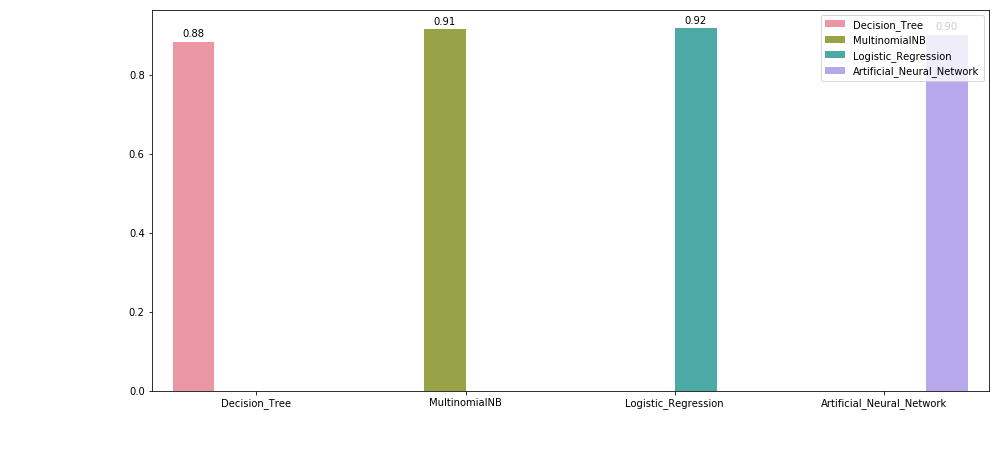

In [203]:
plt.figure(figsize=(15,7))
f_plot = sns.barplot (x=model,y =f_score, hue = model)

for p in f_plot.patches:
    f_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', xytext = (0, 5), textcoords = 'offset points')

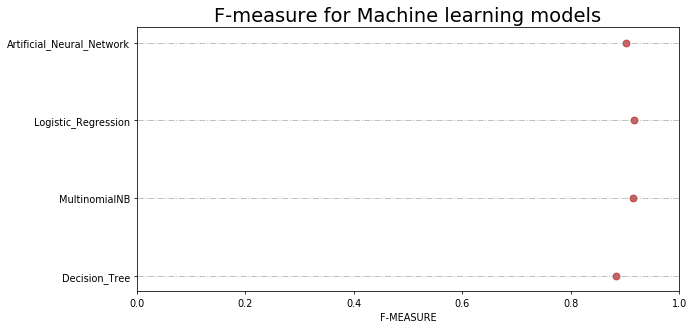

In [204]:
# Draw plot
fig, ax = plt.subplots(figsize=(10,5), dpi= 70)
ax.hlines(y=model, xmin=0.0, xmax=1.0, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.scatter(y=model, x=f_score, s=50, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('F-measure for Machine learning models', fontdict={'size':20})
ax.set_xlabel('F-MEASURE')
ax.set_yticks(model)
ax.set_yticklabels(model, fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 1)
plt.show()


# Testing DT & MultinomialNB models

In [205]:
# Step1 Creating the text to be used for testing the model

st1 ="COVID19 is bad!"
st2 = "online classes are good!"
st3 = "check this out"

newdata =[st1,st2, st3]

convertedData = tf.transform(newdata)

ynew1 = dtree.predict_proba(convertedData)
ynew2 = mn.predict_proba(convertedData)
ynew3 = lr.predict_proba(convertedData)
ynew4 = ann.predict_proba(convertedData)

print('Predecting Results for Decision Tree Model:\n-------------------\n')
print (newdata[0])
print (ynew1[0])

print (newdata[1])
print (ynew1[1])

print (newdata[2])
print (ynew1[2])

print('\n\nPredecting Results for MultinomialNB Model:\n-------------------\n')

print (newdata[0])
print (ynew2[0])

print (newdata[1])
print (ynew2[1])

print (newdata[2])
print (ynew2[2])

print('\n\nPredecting Results for Logestic Regression Model:\n-------------------\n')

print (newdata[0])
print (ynew3[0])

print (newdata[1])
print (ynew3[1])

print (newdata[2])
print (ynew3[2])

print('\n\nPredecting Results for Artificial Neural Network Model:\n-------------------\n')

print (newdata[0])
print (ynew4[0])

print (newdata[1])
print (ynew4[1])

print (newdata[2])
print (ynew4[2])

Predecting Results for Decision Tree Model:
-------------------

COVID19 is bad!
[0. 1. 0.]
online classes are good!
[0. 1. 0.]
check this out
[0. 1. 0.]


Predecting Results for MultinomialNB Model:
-------------------

COVID19 is bad!
[0.22742585 0.56563648 0.20693767]
online classes are good!
[0.07484069 0.83264675 0.09251256]
check this out
[0.02841201 0.890798   0.08078998]


Predecting Results for Logestic Regression Model:
-------------------

COVID19 is bad!
[0.23438375 0.58191863 0.18369763]
online classes are good!
[0.40570834 0.34640036 0.2478913 ]
check this out
[0.06433588 0.81690506 0.11875906]


Predecting Results for Artificial Neural Network Model:
-------------------

COVID19 is bad!
[0.83490471 0.00286124 0.16223405]
online classes are good!
[0.52538374 0.01447087 0.46014539]
check this out
[0.00480551 0.96196163 0.03323285]


# Analyzing the Text and Sentiment

# NPL 4 Steps Pipline

<class 'list'>


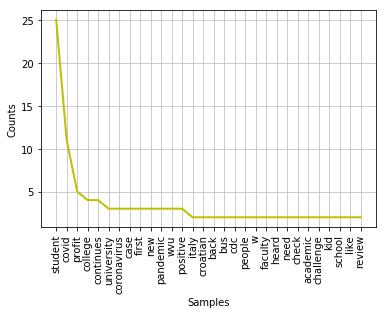

In [206]:
# Step1: Tokenize
table_to_tokenize = str(cleaned_table.text)
tokens = word_tokenize(table_to_tokenize)
print (type(tokens))

# Step2: lowercase
tokens=[word.lower() for word in tokens if word.isalpha()]

# Step3: Stopwords removal
stop_words = set(stopwords.words('english')) 
tokens = [word for word in tokens if not word in stop_words] 

# Step4: lemmatizing 
wnl = WordNetLemmatizer()
stemizedtokens = [wnl.lemmatize(t) for t in tokens]

cleaned_tokens = stemizedtokens
cleaned_tokens_text = Text(stemizedtokens)

cleaned_tokens_text.plot(30)


# Another way to tokenize the text 

In [207]:
# We'll apply the with Stemming and see if we get more meaningful resutls.

# Step1: Tokenize
tokenized_tweets = cleaned_table['text'].apply(lambda x: x.split())

from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

# print(tokenized_tweets.head())

#stitch these tokens back together
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

cleaned_table['text_Stemmed'] = tokenized_tweets
cleaned_table.head()

,date,retweets,favorites,Sentiment,text,time,Tweeting Hour,Tweeting Month,text_Stemmed
0,2020-02-22,32,35,Neutral,University student Ferdos dormitory Iran has b...,21:27:00,21,02,univers student ferdo dormitori iran ha been h...
1,2020-02-23,153,138,Negative,Beheshti University students are protesting #T...,15:11:00,15,02,beheshti univers student are protest #tehran d...
2,2020-02-23,19,14,Neutral,#Italy exchange student and Croatian woman wit...,15:13:00,15,02,#itali exchang student and croatian woman with...
3,2020-02-25,10,8,Neutral,Croatian students back #Croatia buses from the...,09:54:00,09,02,croatian student back #croatia buse from their...
4,2020-02-26,39,21,Neutral,Official #coronavirus cases jump counting evac...,12:27:00,12,02,offici #coronaviru case jump count evacue from...


# Specific Words Frequency

<class 'nltk.text.Text'>
319
319


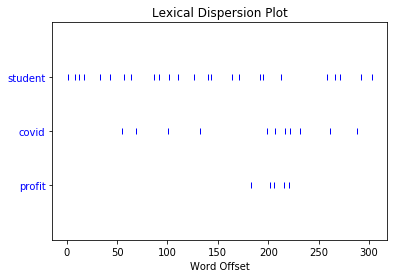

In [208]:
print (type(cleaned_tokens_text))   

print (len(cleaned_tokens))
print(len(cleaned_tokens_text))

cleaned_tokens_text.dispersion_plot(['student', 'covid', 'profit']) 

In [209]:
cleaned_tokens.count('loan')

2

# Hashtags Analysis

In [210]:
# Extract Hashtags Function
def Hashtags_Extract(x):
    hashtags=[]

    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [211]:
# Extracting positive hashtags

ht_positive = Hashtags_Extract(cleaned_table['text_Stemmed'][cleaned_table['Sentiment']=='Positive'])
# ht_positive


In [212]:
#unnest positive hashtags list
from itertools import chain

posList =  list(chain(*ht_positive))
#print(posList)
posListChain =  list(chain.from_iterable(ht_positive))
#print(posListChain)

ht_positive_unnest = posListChain
#print (ht_positive_unnest)

# code below gives the same result
#ht_positive_unnest = sum(ht_positive,[])  
#ht_positive_unnest

In [213]:
# Extracting Negative hashtags
ht_negative = Hashtags_Extract(cleaned_table['text_Stemmed'][cleaned_table['Sentiment']=='Negative'])
#ht_negative

In [214]:
#unnest negative hashtags list

negList =  list(chain(*ht_negative))
#print(negList)
negListChain =  list(chain.from_iterable(ht_negative))
#print (negListChain)

ht_negative_unnest = negListChain
#print (ht_positive_unnest)

In [215]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'covid': 404, 'coronaviru': 36, 'student': 16, 'nogradplan': 14, 'distancelearn': 11, 'flattenthecurv': 10, 'stayhom': 10, 'educ': 9, 'socialdistanc': 7, 'higher': 5, ...})

In [216]:
#The most frequently  words used in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,covid,404
1,cbp,1
2,strongerthancovid,1
3,coronaviru,36
4,nysclean,1
5,mta,1
6,newyork,1
7,coronavirusoutbreak,2
8,cuni,1
9,suni,1


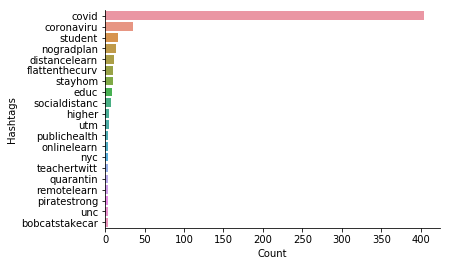

In [217]:
#barplot for the 20 most frequent positive words used for hashtags
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [218]:

word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'covid': 283, 'coronaviru': 31, 'student': 9, 'colleg': 8, 'higher': 8, 'remotelearn': 7, 'pandem': 7, 'cuni': 5, 'nyc': 5, 'closenycpublicschool': 5, ...})

In [219]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,tehran,1
1,coronaviru,31
2,iran,1
3,covid,283
4,sarscov,1
5,kirkland,1
6,wa,1
7,phdchat,3
8,cuni,5
9,letthemplay,1


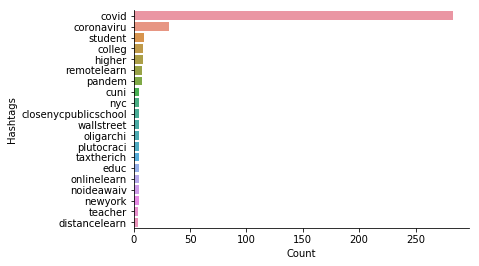

In [220]:
#the 20 most frequent negative words used for hashtags
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# LSA

In [221]:
# Applying LSA with 3 topics

# Step1: Creating bag of words (feature_names)
vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(cleaned_table['text_Stemmed'])
dictionary = vectorizer.get_feature_names()
bag_of_words.todense()


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [231]:
# Step2: Finding U value based on 3 components (Topics) --> relationship between bag _of_words with 3 topics
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
U = svd.fit_transform(bag_of_words)
print(U)


[[ 1.69333482 -0.24890616  0.04273078]
 [ 1.78086938 -0.20312034  0.21471575]
 [ 1.51331878 -0.27709602 -0.71103711]
 ...
 [ 1.83727254  0.14859828  0.73191678]
 [ 1.72361675 -0.06359157  0.58416346]
 [ 1.72668381 -0.09014999  0.55598041]]


In [232]:
# Step3: Finding Sigma Value
# increasding the topics to more than 30 will not change v value too much
S = svd.singular_values_
print(S)

[131.22018279  40.28826539  37.526999  ]


In [233]:
# Step4: Finding the VT Value 
VT = svd.components_
print(VT)

[[ 7.71978964e-04  1.61224801e-04  8.79176538e-04 ...  1.37972913e-04
   8.60450366e-05  8.97918393e-05]
 [-1.26900381e-03  1.53199044e-03 -1.70060938e-03 ... -1.32157555e-04
  -1.41217459e-04 -7.77280336e-05]
 [-1.79082583e-03 -7.95158648e-04 -1.66275863e-03 ...  3.18157143e-04
   4.02154860e-05 -3.47966736e-05]]


In [234]:
# Step5: Printing the relationship of U value and documents

import sklearn
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

topic_encoded_df = pd.DataFrame(U, columns = ["topic_1", "topic_2","topic_3"])
topic_encoded_df['text_Stemmed'] = cleaned_table['text_Stemmed']
#print(topic_encoded_df[["text_Stemmed", "topic_1", "topic_2","topic_3"]])


In [235]:
#Step6: Creating a dictionary with VT values with topics as column index, and the features (bag_of_words) as rows
dictionary = vectorizer.get_feature_names()

encoding_matrix=pd.DataFrame(VT, index=["topic_1", "topic_2","topic_3"], columns=dictionary).T
encoding_matrix.head(2)

,topic_1,topic_2,topic_3
aa,0.000772,-0.001269,-0.001791
aaa,0.000161,0.001532,-0.000795


In [236]:
# Step7: Finding the Abslute values 
import numpy as np
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix['abs_topic_3'] = np.abs(encoding_matrix['topic_3'])

In [237]:
# Topic 1 Sorted Values
encoding_matrix.sort_values('abs_topic_1', ascending=False).head(10)

,topic_1,topic_2,topic_3,abs_topic_1,abs_topic_2,abs_topic_3
student,0.659971,-0.192418,-0.216822,0.659971,0.192418,0.216822
covid,0.597506,-0.047063,-0.101016,0.597506,0.047063,0.101016
twitter,0.206861,0.088906,0.721590,0.206861,0.088906,0.721590
school,0.126860,0.859009,-0.223363,0.126860,0.859009,0.223363
dure,0.117788,0.122563,0.157536,0.117788,0.122563,0.157536
thi,0.112903,-0.010013,0.280581,0.112903,0.010013,0.280581
help,0.086041,-0.030361,0.126275,0.086041,0.030361,0.126275
pandem,0.073918,0.008375,0.037313,0.073918,0.008375,0.037313
coronaviru,0.067752,0.020390,-0.116284,0.067752,0.020390,0.116284
learn,0.065084,0.119123,0.106551,0.065084,0.119123,0.106551


In [238]:
# Topic 2 Sorted Values
encoding_matrix.sort_values('abs_topic_2', ascending=False).head(10)# Topic 2 sorted values

,topic_1,topic_2,topic_3,abs_topic_1,abs_topic_2,abs_topic_3
school,0.126860,0.859009,-0.223363,0.126860,0.859009,0.223363
student,0.659971,-0.192418,-0.216822,0.659971,0.192418,0.216822
close,0.025157,0.149307,-0.033177,0.025157,0.149307,0.033177
educ,0.065056,0.130139,0.072474,0.065056,0.130139,0.072474
dure,0.117788,0.122563,0.157536,0.117788,0.122563,0.157536
learn,0.065084,0.119123,0.106551,0.065084,0.119123,0.106551
closur,0.022026,0.115198,-0.026926,0.022026,0.115198,0.026926
colleg,0.058058,-0.091498,-0.062356,0.058058,0.091498,0.062356
twitter,0.206861,0.088906,0.721590,0.206861,0.088906,0.721590
teacher,0.035533,0.083074,0.040494,0.035533,0.083074,0.040494


In [239]:
# Topic 3 Sorted Values
encoding_matrix.sort_values('abs_topic_3', ascending=False).head(10)

,topic_1,topic_2,topic_3,abs_topic_1,abs_topic_2,abs_topic_3
twitter,0.206861,0.088906,0.721590,0.206861,0.088906,0.721590
thi,0.112903,-0.010013,0.280581,0.112903,0.010013,0.280581
statu,0.044838,0.007028,0.237078,0.044838,0.007028,0.237078
school,0.126860,0.859009,-0.223363,0.126860,0.859009,0.223363
student,0.659971,-0.192418,-0.216822,0.659971,0.192418,0.216822
dure,0.117788,0.122563,0.157536,0.117788,0.122563,0.157536
help,0.086041,-0.030361,0.126275,0.086041,0.030361,0.126275
coronaviru,0.067752,0.020390,-0.116284,0.067752,0.020390,0.116284
learn,0.065084,0.119123,0.106551,0.065084,0.119123,0.106551
covid,0.597506,-0.047063,-0.101016,0.597506,0.047063,0.101016


# WordCloud

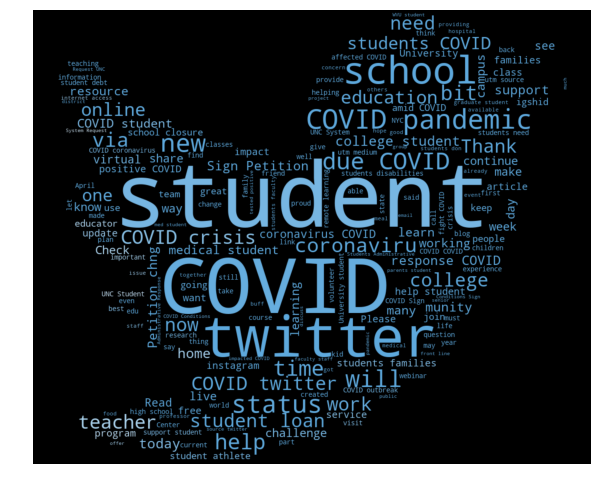

In [240]:
# Applying the wordCloud on all cleaned but not stemmed nor pipelined data.
# Using all tweets (4424 tweets)

all_words = ' '.join(text for text in cleaned_table['text'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
#We use the ImageColorGenerator library from Wordcloud 
#Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()


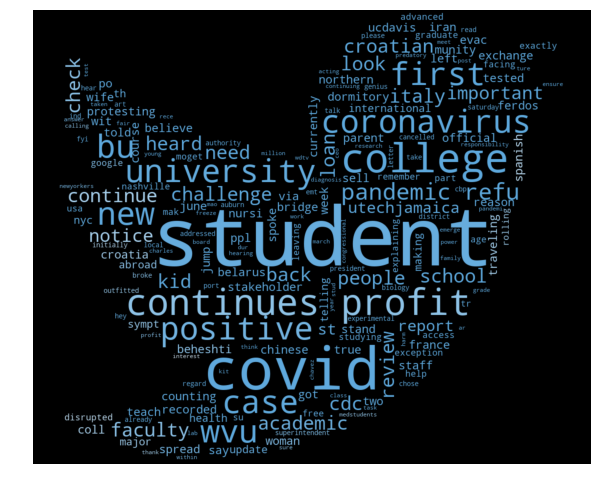

In [241]:
# Applying the wordCloud on Pipelined data 

all_words_positive = ' '.join(text for text in cleaned_tokens_text)
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
 
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

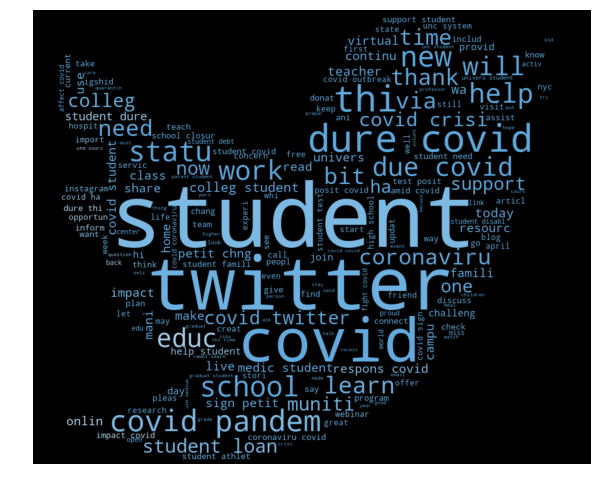

In [242]:
# Applying the wordCloud on stemmed data 

all_words_positive = ' '.join(text for text in cleaned_table['text_Stemmed'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
 
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

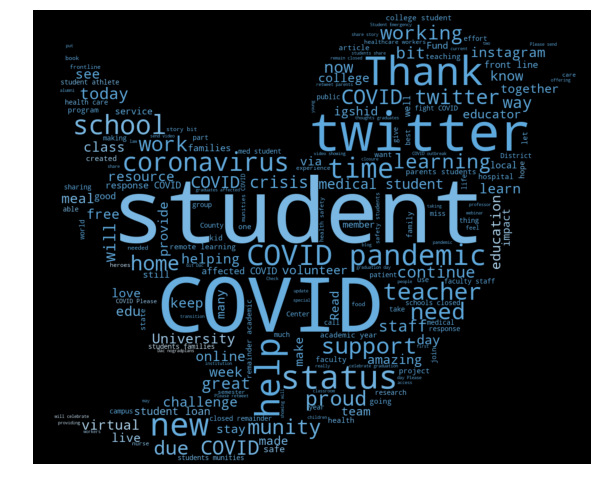

In [243]:
# Applying the wordCloud on cleaned but not stemmed data (Positive).

all_words_positive = ' '.join(text for text in cleaned_table['text'][cleaned_table['Sentiment']=='Positive'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()


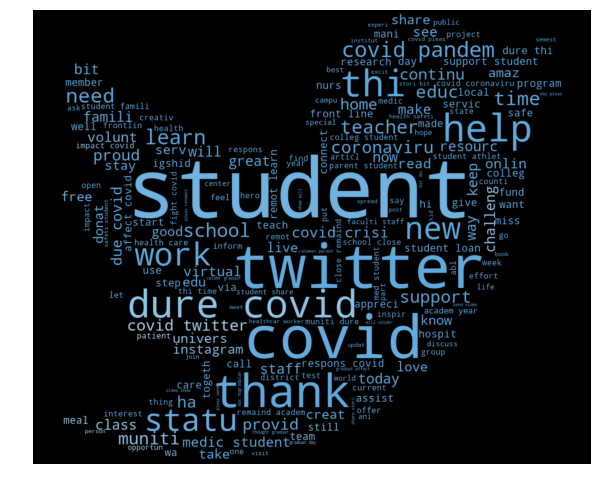

In [244]:
# Applying the wordCloud on stemmed data (Positive)

all_words_positive = ' '.join(text for text in cleaned_table['text_Stemmed'][cleaned_table['Sentiment']=='Positive'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
 
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

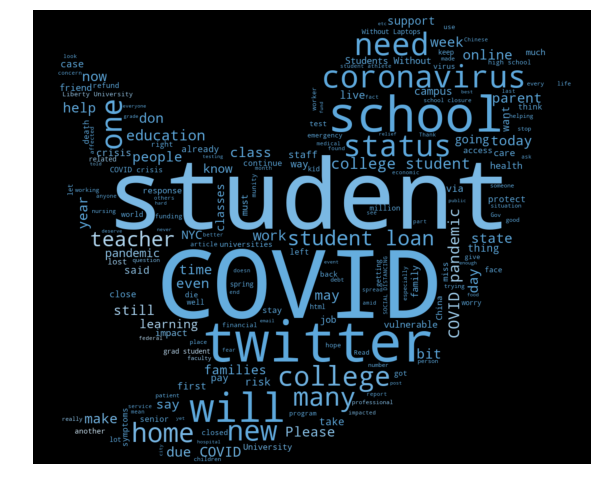

In [249]:
# Applying the wordCloud on cleaned but not stemmed data (Negative).

all_words_positive = ' '.join(text for text in cleaned_table['text'][cleaned_table['Sentiment']=='Negative'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()


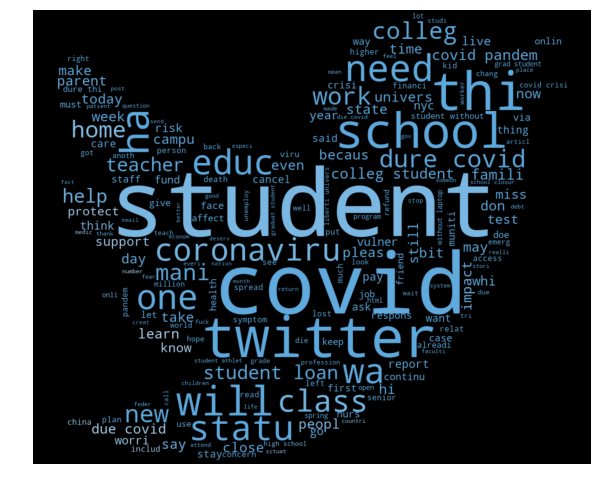

In [250]:
# Applying the wordCloud on stemmed data (Negative)

all_words_positive = ' '.join(text for text in cleaned_table['text_Stemmed'][cleaned_table['Sentiment']=='Negative'])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
 
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

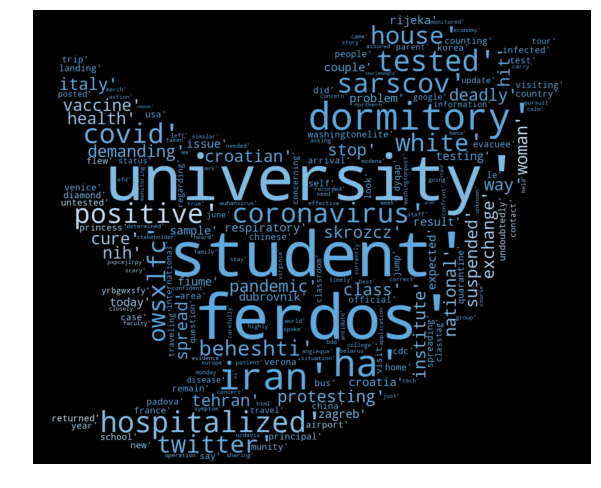

In [247]:
# Applying the wordCloud on vectorized words dictionary

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(str(cv1))
 
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()